* Cognifyz - Data Science Intern
* Level 03 - Task 02
* Customer Preferance Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the libraries which are going to use foe EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [3]:
#Load the Dataset 

df = pd.read_csv(r"C:\Users\DELL\Downloads\Dataset .csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- Analyze the relationship between the type of cuisine and the restaurants rating.

In [22]:
cuisines = df["Cuisines"]

In [23]:
cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [24]:
top_10_cuisines = cuisines.value_counts().head(10).index

In [25]:
cuisine_ratings = pd.DataFrame({"cuisine" : cuisines, "Rating" : df["Aggregate rating"]})

In [26]:
cuisines_ratings_top_10 = cuisine_ratings[cuisine_ratings["cuisine"].isin(top_10_cuisines)]

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

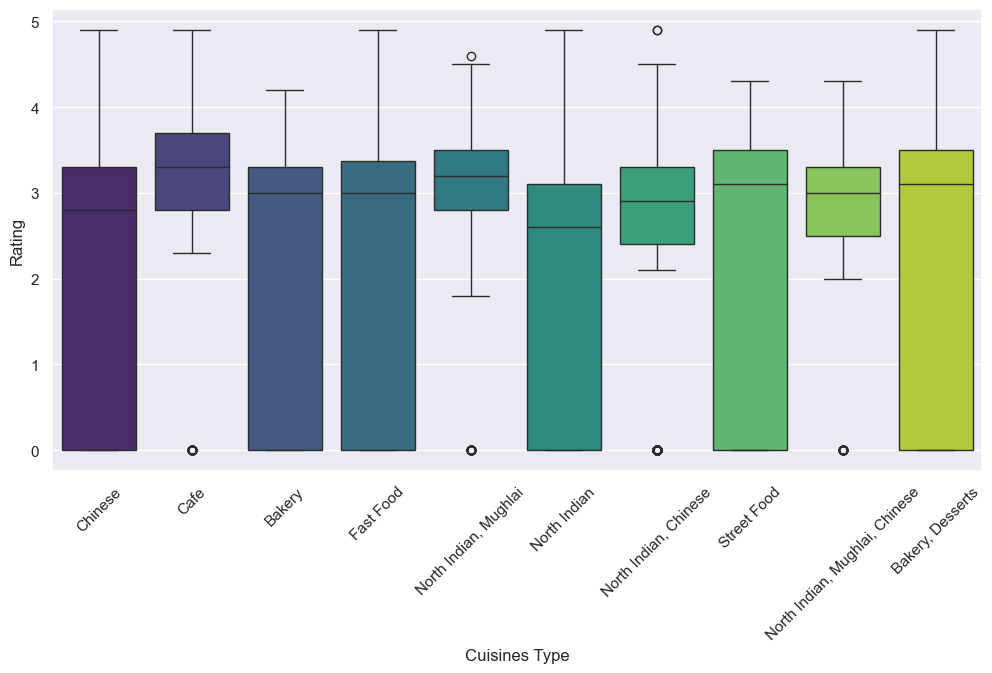

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 10 cuisines
cuisine_ratings_top_10 = cuisine_ratings[cuisine_ratings["cuisine"].isin(top_10_cuisines)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="cuisine", y="Rating", data=cuisine_ratings_top_10, palette="viridis")
plt.xlabel("Cuisines Type")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

* Identify the most popular cuisines among customers based on the number of votes

In [30]:
cuisines_votes = pd.DataFrame({"Cuisine" : cuisines, "Votes" : df["Votes"]})

In [37]:
# create the dataframe (use the same name consistently)
cuisines_votes = pd.DataFrame({"Cuisine": cuisines, "Votes": df["Votes"]})

# group by Cuisine and sum votes, sort descending, and reset index
cuisines_votes_sum = (
    cuisines_votes
    .groupby("Cuisine")["Votes"]
    .sum()
    .reset_index()
    .sort_values("Votes", ascending=False)
)

# show top 10 most popular cuisines
print(cuisines_votes_sum.head(10))

                             Cuisine  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

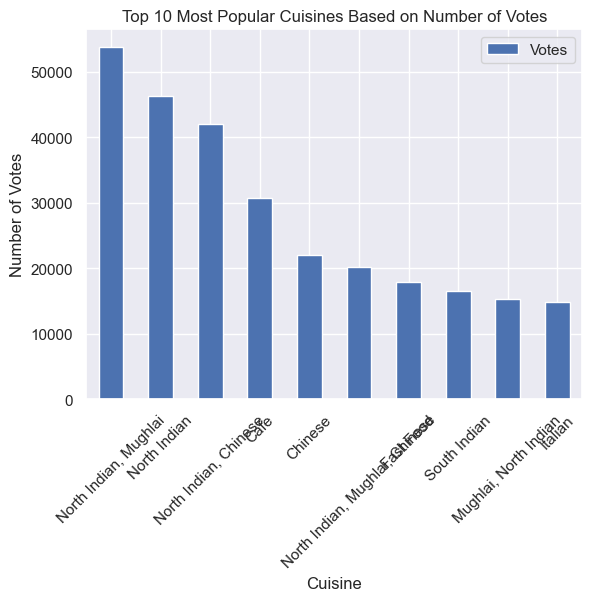

In [41]:
plt.figure(figsize=(10, 6))
cuisines_votes_sum.head(10).plot(kind="bar", x="Cuisine", y="Votes")
plt.title("Top 10 Most Popular Cuisines Based on Number of Votes")
plt.xlabel("Cuisine")
plt.ylabel("Number of Votes")
plt.xticks(rotation=45)
plt.show()

* Determine if there are any specific cuisines that tend to receive higher rating 

In [42]:
cuisine_ratings = pd.DataFrame({"Cuisines" : Cuisines, "Rating" : df["Aggregate rating"]})

In [54]:
average_rating_by_Cuisines = cuisine_ratings.groupby("Cuisines")["Rating"].mean()

In [55]:
sorted_cuisines_by_rating = average_rating_by_Cuisines.sort_values(ascending=False)

In [56]:
print("Top 10 Cuisines with the Highest Average Ratings : ")
print(sorted_cuisines_by_rating.head(10))

Top 10 Cuisines with the Highest Average Ratings : 
Cuisines
American, Coffee and Tea    4.9
American, BBQ, Sandwich     4.9
Burger, Bar Food, Steak     4.9
Sunda, Indonesian           4.9
Mughlai, Lucknowi           4.9
European, German            4.9
European, Contemporary      4.9
European, Asian, Indian     4.9
Italian, Deli               4.9
American, Sandwich, Tea     4.9
Name: Rating, dtype: float64


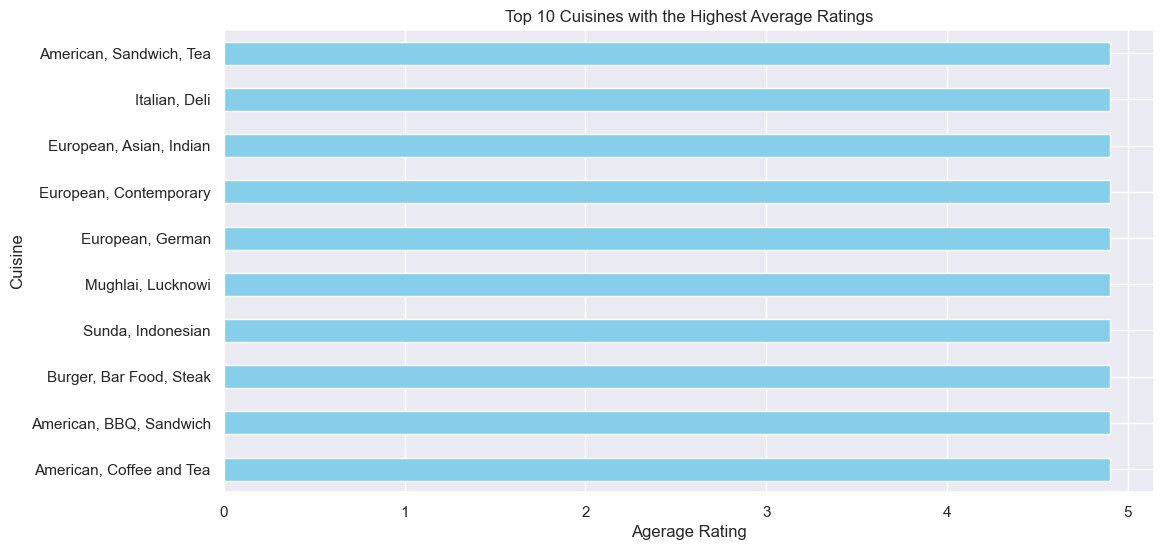

In [57]:
plt.figure(figsize=(12, 6))
sorted_cuisines_by_rating.head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 Cuisines with the Highest Average Ratings")
plt.xlabel("Agerage Rating")
plt.ylabel("Cuisine")
plt.show()